# Statistiques en grande dimension

## Projet 1 : Estimation de densité

Hajji Mohammed

In [2]:
from numpy import *
from math import *
import scipy.stats as stat
import scipy.integrate as intgr
import matplotlib.pyplot as plt
import csv
#from random import random

## Exercice 1

#### 1.a$)$ Générer un echantillon de taille 50 d'une gaussienne $\mathcal{N}$(-1,5;2)

In [3]:
mu = -1.5
sigma = 2.0
X1=random.normal(mu,sigma,50)

#### 1.b$)$ Générer un echantillon de taille 50 d'une loi uniforme $\mathcal{U}$[0,1]}

In [4]:
X2=random.uniform(0,1,50)

#### 1.c$)$ Concaténation de X1 et X2

In [5]:
X=concatenate((X1,X2),axis=None)

$\textbf{(2.a) Construction de l'histogramme de X}$

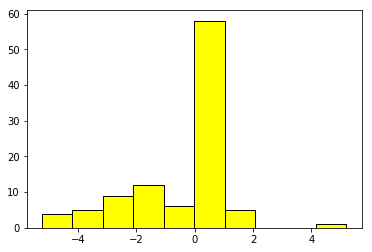

In [6]:
plt.hist(X,color='yellow',edgecolor='black')
plt.show()

$\textbf{(2.b)}$

###### -Construction de $\hat{f},$  l'estimateur à noyau de $f$ en utilisant le noyau rectangulaire.

In [7]:
def frectchap(X,z,h):
    n=size(X) # taille de X
    result=0 # on initialise le calcul 
    for i in range(n):
        result=1/(n*h)*(1/2)*(((X[i]-z)/h)<=1 and ((X[i]-z)/h)>=-1)+result
  # on somme n fois selon les valeurs de X
    return(result)  

In [8]:
minX=amin(X) # minimum du vecteur X
maxX=amax(X) # minimum du vecteur X
taillex=300  
x=linspace(minX,maxX,taillex) # on subdivise X en 100 points
h=0.5 # on choisit une fenêtre

  Calcul de $\hat{f}$$(x)$ pour 100 points compris entre $min(X)$ et $max(X)$ de pas uniforme, en utilisant le noyau rectangulaire. 

In [9]:
frect=[frectchap(X,i,h) for i in x]  

* Courbe de $\hat{f}$ en utilisant le noyau rectangulaire

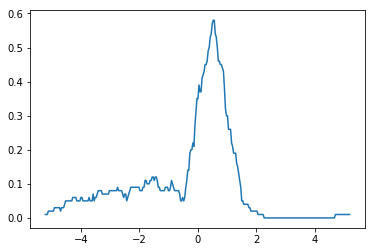

In [10]:
plt.plot(x,frect)
plt.show()

In [11]:
#def fgausschap(X,z,h):
 #   n=size(X)
  #  result=0
   # for i in range(n):
    #        result=1/(n*h*sqrt(2*pi))*exp(-((X[i]-z)/h)**2/2)+result
    #return(result)  

#### -Construction de $\hat{f},$ l'estimateur à noyau de $f$ en utilisant le noyau triangulaire.

In [12]:
def ftriangchap(X,z,h):
    n=size(X) # taille de X
    result=0 # on initialise le calcul 
    for i in range(n):
        result=(1/(n*h))*(1-abs((X[i]-z)/h))*(abs((X[i]-z)/h)<=1)+result
        # on somme n fois selon les valeurs de X
    return(result)  

In [13]:
h1=0.3

  Calcul de $\hat{f}$$(x)$  pour 100 points compris entre $min(X)$ et $max(X)$ de pas uniforme, en utilisant le noyau triagulaire. 

In [14]:
ftriang=[ftriangchap(X,i,h1) for i in x]

* Courbe de $\hat{f}$ en utilisant le noyau triangulaire

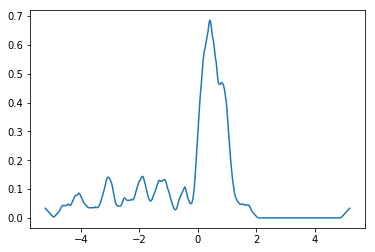

In [15]:
plt.plot(x,ftriang)
plt.show()

#### 2.c$)$ Méthode de la validation croisée

In [16]:
def CVrect(h,X):
    n=len(X) #taille de X
    
    frect=[frectchap(X,i,h) for i in x] # fchapeau de x 
    frectcar= [x*x for x in frect] ##carré de fchapeau de x
    integfrectcar= trapz(frectcar,x) ##intégrale de f chapeau carré de x
    deuxGchap=0 # initialisation du calcul
    for i in range(n):
        for j in range(n):
            deuxGchap=deuxGchap+(1/(n*(n-1)*h))*((((X[j]-X[i])/h)<=1) and ((X[j]-X[i])/h)>=(-1) and (j!=i))
            # on fait une 
            #double somme en evitant le cas j=i.
    return(integfrectcar-deuxGchap) #correspond à J(h) vu en cours 

In [17]:
pash=0.05 # le pas de h
h=arange(0+pash,2,pash)# intervalle de définition de h (les points que h peut prendre) 
tailleh=size(h) #nombre de points que h peut prendre
hopt=0 # initialisation de hopt
CVstock=zeros(tailleh)# initialisation du vecteur de stockage 
for i in range(tailleh):
    CVstock[i]=CVrect(h[i],X) # calcul de cv(hi) (en respectant les notations du cours) pour chaque hi 
    #dans le vecteur h définie précedemment
    print("Cv(h)=",CVstock[i]," pour h=",h[i]) #affichage de cv(hi) pour chaque hi dans l'intrevalle h
hopt=h[argmin(CVstock)] # valeur de hopt
print("h optimal=",hopt)# affichage de la valeur de hopt

Cv(h)= -0.24868216133550952  pour h= 0.05
Cv(h)= -0.31123143227805555  pour h= 0.1
Cv(h)= -0.3093277545845139  pour h= 0.15000000000000002
Cv(h)= -0.2999394324566915  pour h= 0.2
Cv(h)= -0.31256218537646724  pour h= 0.25
Cv(h)= -0.3057404112562921  pour h= 0.3
Cv(h)= -0.3150949382595186  pour h= 0.35000000000000003
Cv(h)= -0.3103269225958797  pour h= 0.4
Cv(h)= -0.31279801024290815  pour h= 0.45
Cv(h)= -0.3027181113106826  pour h= 0.5
Cv(h)= -0.3059845749279147  pour h= 0.55
Cv(h)= -0.30648895834250384  pour h= 0.6000000000000001
Cv(h)= -0.2984536641490381  pour h= 0.6500000000000001
Cv(h)= -0.29158079963345684  pour h= 0.7000000000000001
Cv(h)= -0.2815077437571426  pour h= 0.7500000000000001
Cv(h)= -0.2759578904957716  pour h= 0.8
Cv(h)= -0.27424165792451205  pour h= 0.8500000000000001
Cv(h)= -0.269314645955703  pour h= 0.9000000000000001
Cv(h)= -0.2604091607606898  pour h= 0.9500000000000001
Cv(h)= -0.2500413502370772  pour h= 1.0
Cv(h)= -0.24026822627292682  pour h= 1.05
Cv(h)= -0.2

* $\textbf{L'estimateur optimal (en utilisant le noyau rectangulaire) est donc:}$ 

In [18]:
frectopt=[frectchap(X,i,hopt) for i in x]

* $\textbf{Et sa courbe:}$

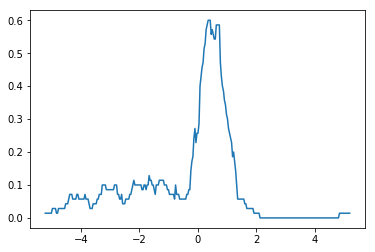

In [19]:
plt.plot(x,frectopt)
plt.show()

In [20]:
def CVtriang(h):
    n=len(X)
    ftriang=[ftriangchap(X,i,h) for i in x]
    ftriangcar= [x*x for x in ftriang] ##carré de fchapeau de x
    integftriangcar= trapz(ftriangcar,x) ##intégrale de f chapeau carré x
    deuxGchap1=0
    for i in range(n):
        for j in range(n):
            deuxGchap1=deuxGchap1+(2/(n*(n-1)*h))*((1-abs(((X[j]-X[i])/h)))*(abs(((X[j]-X[i])/h))<=1) and (j!=i))
    return(integftriangcar-deuxGchap1) #correspond à J(h) vu en cours 

In [21]:
pash=0.005 # Pas de h
h=arange(0+pash,0.4,pash) # intervalle de définition de h (les points que h peut prendre)
tailleh=size(h)# #nombre de points que h peut prendre
hopt=0
CVstock1=zeros(tailleh) # initialisation du vecteur de stockage
for i in range(tailleh):
    CVstock1[i]=CVtriang(h[i])
    print("Cv(h)=",CVstock1[i]," pour h=",h[i])#affichage de cv(hi) pour chaque hi dans l'intrevalle h
hopt=h[argmin(CVstock1)]# valeur de hopt
print("h optimal=",hopt) # affichage de la valeur de hopt

Cv(h)= -0.30912164554940724  pour h= 0.005
Cv(h)= -0.7704704080616394  pour h= 0.01
Cv(h)= -0.7876155414942292  pour h= 0.015
Cv(h)= -0.9345603830475239  pour h= 0.02
Cv(h)= -0.9985482901905768  pour h= 0.025
Cv(h)= -1.0428298846619306  pour h= 0.030000000000000002
Cv(h)= -0.9630115156638341  pour h= 0.034999999999999996
Cv(h)= -0.9488251094253951  pour h= 0.04
Cv(h)= -0.9048348476024808  pour h= 0.045
Cv(h)= -0.9017209318894387  pour h= 0.049999999999999996
Cv(h)= -0.9303271129179964  pour h= 0.055
Cv(h)= -0.9076775263586703  pour h= 0.06
Cv(h)= -0.939063080156975  pour h= 0.065
Cv(h)= -0.9712703849686761  pour h= 0.07
Cv(h)= -0.976661855001434  pour h= 0.07500000000000001
Cv(h)= -0.9355559619409688  pour h= 0.08
Cv(h)= -0.9510857330383875  pour h= 0.085
Cv(h)= -0.9560999609390248  pour h= 0.09000000000000001
Cv(h)= -0.9487490180933748  pour h= 0.095
Cv(h)= -0.9548933965941844  pour h= 0.1
Cv(h)= -0.9604004456902078  pour h= 0.10500000000000001
Cv(h)= -0.9576485708070114  pour h= 0.11

* $\textbf{l'estimateur optimal (en utilisant le noyau triangulaire) est donc:}$ 

In [22]:
ftriangopt=[ftriangchap(X,i,hopt) for i in x]

* $\textbf{Et sa courbe:}$

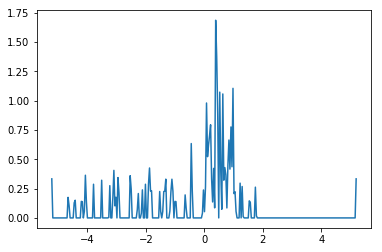

In [23]:
plt.plot(x,ftriangopt)
plt.show()

In [24]:
##def CVgauss(h,X):
    #n=len(X)
    #fgauss=[fgausschap(X,i,h) for i in x]
    #fgausscar= [x*x for x in fgauss] ##carré de fchapeau
    #integfgausscar= trapz(fgausscar,x) ##intégrale de f chapeau carré
    #deuxGchap2=0
    #for i in range(n):
       # for j in range(n):
           # deuxGchap2=deuxGchap2+(2/(n*(n-1)*sqrt(2*pi)*h))*(exp(-(((X[j]-X[i])/h)**2)/2) and (j!=i))
    #return(integfgausscar-deuxGchap2)

In [25]:
#pash=0.001
#h=arange(0+pash,0.3,pash)
#tailleh=size(h)
#hopt=0
#CVstock2=zeros(tailleh)
#for i in range(tailleh):
 #   CVstock2[i]=CVgauss(h[i],X)
  #  print("Cv(h)=",CVstock2[i]," pour h=",h[i])
#hopt=h[argmin(CVstock2)]
#print("h optimal=",hopt)

## Exercice 2:

Pour cet exercice, nous avons utilisé la base de donnée représentant le salaire médiant des étudiants issus des universités américaines en milieu de carrière. On regardera ces données en milliers de dollars (par exemple 50 correspond à 50000 dollars)
Source : https://www.kaggle.com/kmuvunyi/salaries#salaries-by-region.csv

On télécharge d'abord le fichier csv et on le stocke dans  une liste grâce au code suivant :

In [27]:
Xstock=[]
with open('/Users/hajjimohammed/Desktop/salaries-by-region.csv',newline='')as f:
    reader= csv.reader(f)
    for row in reader:
        Xstock.append(row)

On retire ensuite la colonne qui nous intéresse (la colonne n°3) privée de l'entête et on la stocke dans la liste "salairestock" : 

In [28]:
salaires = [i[3] for i in Xstock]
nbligne=len(salaires)
salairestock=salaires[1:nbligne].copy()

In [29]:
salairestock=array(salairestock).astype(float)/1000

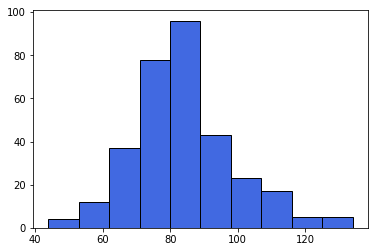

In [30]:
plt.hist(salairestock,color='royalblue',edgecolor='black')
plt.show()

In [31]:
minsalaire=amin(salairestock)
maxsalaire=amax(salairestock)
taillesalaire=1000
x=linspace(minsalaire,maxsalaire,taillesalaire)
h=6

In [32]:
fsalaries=[frectchap(salairestock,i,h) for i in x]

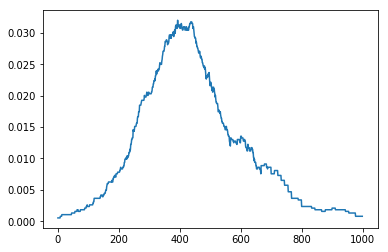

In [33]:
plt.plot(fsalaries)
plt.show()

In [34]:
pash=0.05
h=arange(8,9,pash)
tailleh=size(h)
hopt=0
CVstocksal=zeros(tailleh)
for i in range(tailleh):
    CVstocksal[i]=CVrect(h[i],salairestock)
    print("Cv(h)=",CVstocksal[i]," pour h=",h[i])
hopt=h[argmin(CVstocksal)]
print("h optimal=",hopt)

Cv(h)= -0.01999259822109281  pour h= 8.0
Cv(h)= -0.01976696678852819  pour h= 8.05
Cv(h)= -0.01980095494641152  pour h= 8.100000000000001
Cv(h)= -0.019786657011113342  pour h= 8.150000000000002
Cv(h)= -0.020024084155000628  pour h= 8.200000000000003
Cv(h)= -0.019811003179954836  pour h= 8.250000000000004
Cv(h)= -0.019940540274917755  pour h= 8.300000000000004
Cv(h)= -0.019814691476667274  pour h= 8.350000000000005
Cv(h)= -0.019981265317625473  pour h= 8.400000000000006
Cv(h)= -0.019766875390262985  pour h= 8.450000000000006
Cv(h)= -0.01988273585971781  pour h= 8.500000000000007
Cv(h)= -0.019669633403737116  pour h= 8.550000000000008
Cv(h)= -0.019842254023325172  pour h= 8.600000000000009
Cv(h)= -0.01962931401408151  pour h= 8.65000000000001
Cv(h)= -0.01982023939672391  pour h= 8.70000000000001
Cv(h)= -0.019622574678151018  pour h= 8.75000000000001
Cv(h)= -0.019803439052282667  pour h= 8.800000000000011
Cv(h)= -0.01960130000066347  pour h= 8.850000000000012
Cv(h)= -0.019802409098043837 

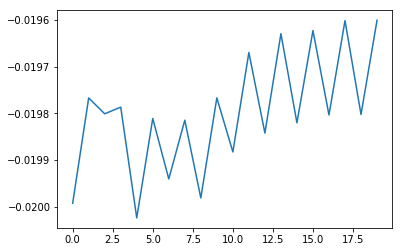

In [35]:
plt.plot(CVstocksal)